In [3]:
# import pprint
# import sys

# pprint.pprint(sys.path)

['/home/yoshi/miniconda3/envs/tensorflow-gpu/lib/python36.zip',
 '/home/yoshi/miniconda3/envs/tensorflow-gpu/lib/python3.6',
 '/home/yoshi/miniconda3/envs/tensorflow-gpu/lib/python3.6/lib-dynload',
 '',
 '/home/yoshi/miniconda3/envs/tensorflow-gpu/lib/python3.6/site-packages',
 '/home/yoshi/miniconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/locket-0.2.1-py3.6.egg',
 '/home/yoshi/miniconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/extensions',
 '/home/yoshi/.ipython']


In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import os
import sys
sys.path.append('/mnt/c/Users/44yos/RacePrediction/resnet_win5')
from os import path
import tempfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import tensorflow as tf
# from tensorflow.python import keras
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras import regularizers
# from tensorflow.python.keras.models import load_model

import matplotlib.pyplot as plt 
from scipy.stats import norm

from models import resnet

In [2]:
# load data
data = pd.read_csv("../data/csv/data.csv", sep = ",")

In [3]:
# adjust columns type
data['race_id'] = data['race_id'].astype(str)
data['race_round'] = data['race_round'].astype(str)
#data['total_horse_number'] = data['total_horse_number'].astype(str)
data['order'] = data['order'].astype(str)
data['frame_number'] = data['frame_number'].astype(str)
data['horse_number'] = data['horse_number'].astype(str)


In [4]:
# split labels and parameter
labels = data[["race_id", "order", "horse_number", "half_order", "last_time", "horse_weight", "horse_weight_dif"]]

In [5]:
row_x = data.drop(["race_id","order","horse_number", "half_order", "goal_time" ,"last_time", "horse_weight", "horse_weight_dif", "race_round", "frame_number"], axis = 1)
print(row_x.shape)
print(row_x.columns)
row_x.head(5)

(92034, 140)
Index(['ground_condition', 'total_horse_number', 'age', 'burden_weight',
       'odds', 'pop', 'race_rank', 'distance', 'ground_type_ダ',
       'ground_type_芝',
       ...
       'main_place_東京_3', 'main_place_福島_3', 'main_place_阪神_3', 'race_rank_3',
       'ground_type_ダ_3', 'ground_type_芝_3', 'ground_type_障_3',
       'horse_weight_dif_3', 'same_jockey_3', 'same_jockey'],
      dtype='object', length=140)


,ground_condition,total_horse_number,age,burden_weight,odds,pop,race_rank,distance,ground_type_ダ,ground_type_芝,circle_右,circle_左,weather_circumstance_小雨,weather_circumstance_小雪,weather_circumstance_晴,weather_circumstance_曇,weather_circumstance_雨,weather_circumstance_雪,place_中京,place_中山,place_京都,place_函館,place_小倉,place_新潟,place_札幌,place_東京,place_福島,place_阪神,sex_セ,sex_牝,sex_牡,f_grass_win_rate,f_dart_win_rate,f_win_rate,g_f_grass_win_rate,g_f_dart_win_rate,g_f_win_rate,m_grass_win_rate,m_dart_win_rate,m_win_rate,whole_horse_number_1,odds_1,order_1,burden_weight_1,race_distance_1,ground_condition_1,goal_time_1,half_order_1,last_time_1,horse_weight_1,weather_circumstance_小雨_1,weather_circumstance_小雪_1,weather_circumstance_晴_1,weather_circumstance_曇_1,weather_circumstance_雨_1,weather_circumstance_雪_1,main_place_その他_1,main_place_中京_1,main_place_中山_1,main_place_京都_1,main_place_函館_1,main_place_小倉_1,main_place_新潟_1,main_place_札幌_1,main_place_東京_1,main_place_福島_1,main_place_阪神_1,race_rank_1,ground_type_ダ_1,ground_type_芝_1,ground_type_障_1,horse_weight_dif_1,same_jockey_1,whole_horse_number_2,odds_2,order_2,burden_weight_2,race_distance_2,ground_condition_2,goal_time_2,half_order_2,last_time_2,horse_weight_2,weather_circumstance_小雨_2,weather_circumstance_小雪_2,weather_circumstance_晴_2,weather_circumstance_曇_2,weather_circumstance_雨_2,weather_circumstance_雪_2,main_place_その他_2,main_place_中京_2,main_place_中山_2,main_place_京都_2,main_place_函館_2,main_place_小倉_2,main_place_新潟_2,main_place_札幌_2,main_place_東京_2,main_place_福島_2,main_place_阪神_2,race_rank_2,ground_type_ダ_2,ground_type_芝_2,ground_type_障_2,horse_weight_dif_2,same_jockey_2,whole_horse_number_3,odds_3,order_3,burden_weight_3,race_distance_3,ground_condition_3,goal_time_3,half_order_3,last_time_3,horse_weight_3,weather_circumstance_小雨_3,weather_circumstance_小雪_3,weather_circumstance_晴_3,weather_circumstance_曇_3,weather_circumstance_雨_3,weather_circumstance_雪_3,main_place_その他_3,main_place_中京_3,main_place_中山_3,main_place_京都_3,main_place_函館_3,main_place_小倉_3,main_place_新潟_3,main_place_札幌_3,main_place_東京_3,main_place_福島_3,main_place_阪神_3,race_rank_3,ground_type_ダ_3,ground_type_芝_3,ground_type_障_3,horse_weight_dif_3,same_jockey_3,same_jockey
0,1,11,3,54.0,3.3,1.0,0,1400,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.333333,1.0,0.428571,18.0,60.7,8,54.0,1600.0,1.0,96.4,0.194444,34.9,496.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,4.0,1.0,9.0,4.4,1,54.0,1400.0,1.0,82.7,0.111111,33.9,492.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-4.0,1.0,16.0,4.3,1,51.0,1200.0,3.0,69.7,0.125000,36.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0
1,1,11,3,54.0,3.3,1.0,0,1400,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.333333,1.0,0.428571,18.0,60.7,8,54.0,1600.0,1.0,96.4,0.194444,34.9,496.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,4.0,1.0,9.0,4.4,1,54.0,1400.0,1.0,82.7,0.111111,33.9,492.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-4.0,1.0,16.0,4.3,1,51.0,1200.0,3.0,69.7,0.125000,36.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0
2,1,11,3,56.0,5.3,2.0,0,1400,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.000000,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,16.0,27.1,11,56.0,1600.0,1.0,95.8,0.125000,37.0,512.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,6.0,0.0,14.0,3.2,2,55.0,1400.0,1.0,81.9,0.357143,34.7,506.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-12.0,0.0,16.0,1.3,1,55.0,1400.0,1.0,82.3,0.062500,36.4,518.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0
3,1,11,3,57.0,6.6,4.0,0,1400,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.384

In [6]:
row_y = labels["order"].values
y = np_utils.to_categorical(row_y)

standard_scale = StandardScaler()
x = standard_scale.fit_transform(row_x)
# x = row_x

In [7]:
# split train test data

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
# OWN_FILE_NAME = path.splitext(path.basename('\\Users\\vmlab\\win5.ext'))[0]

model = resnet.resrace(X_train.shape[1], Y_train.shape[1])

# class_weights = {0:13,
#                 1:13,
#                 2:13,
#                 3:13,
#                 4:14,
#                 5:14,
#                 6:14,
#                 7:14,
#                 8:14,
#                 9:15,
#                 10:15,
#                 11:16,
#                 12:18,
#                 13:20,
#                 14:23,
#                 15:28,
#                 16:36,
#                 17:159,
#                 18:215}
history = model.fit(X_train, Y_train, batch_size = 512, epochs = 10, validation_split = 0.1) #class_weight = class_weights
# tmpdir = tempfile.mkdtemp()
# model_path = os.path.join(tmpdir, "/model/win5_resrace_model/")
# tf.saved_model.save(model, model_path)
model.save_weights("../models/results/win5_resrace_model.h5")

Train on 66264 samples, validate on 7363 samples
Epoch 1/10
66264/66264 [==============================] - 19s 282us/sample - loss: 4.3647 - acc: 0.0838 - val_loss: 8.8111 - val_acc: 0.0819
Epoch 2/10
66264/66264 [==============================] - 14s 216us/sample - loss: 3.5423 - acc: 0.1005 - val_loss: 4.2388 - val_acc: 0.1009
Epoch 3/10
66264/66264 [==============================] - 14s 215us/sample - loss: 3.2705 - acc: 0.1059 - val_loss: 3.0562 - val_acc: 0.1130
Epoch 4/10
66264/66264 [==============================] - 14s 214us/sample - loss: 3.2726 - acc: 0.1007 - val_loss: 3.3327 - val_acc: 0.1009
Epoch 5/10
66264/66264 [==============================] - 14s 215us/sample - loss: 3.2010 - acc: 0.1053 - val_loss: 3.1517 - val_acc: 0.1047
Epoch 6/10
66264/66264 [==============================] - 14s 215us/sample - loss: 3.1440 - acc: 0.1062 - val_loss: 3.1887 - val_acc: 0.1036
Epoch 7/10
66264/66264 [==============================] - 14s 215us/sample - loss: 3.0748 - acc: 0.1089 -

In [10]:
# predict

pred = model.predict(X_test)
pred_order = np.argmax(pred, axis = 1)
Y_ans = np.argmax(Y_test, axis = 1)


In [13]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


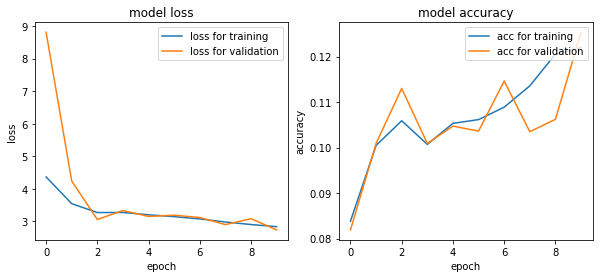

In [16]:
# plot 
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
# for loss
axL.plot(history.history['loss'],label="loss for training")
axL.plot(history.history['val_loss'],label="loss for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')
axR.plot(history.history['acc'],label="acc for training")
axR.plot(history.history['val_acc'],label="acc for validation")
axR.set_title('model accuracy')
axR.set_xlabel('epoch')
axR.set_ylabel('accuracy')
axR.legend(loc='upper right')
# figureの保存
plt.savefig("../models/results/result.png")

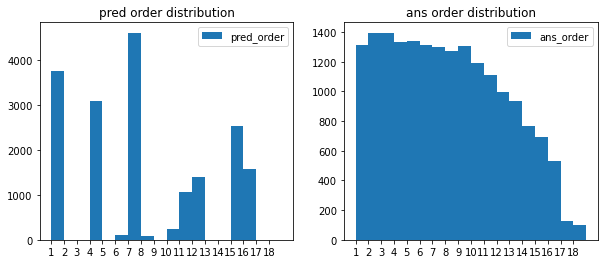

In [12]:
# 何位に予想した？　何位が含まれていた？
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
label = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

axL.hist(pred_order, bins = 18, label = "pred_order", range = (1,19))
axL.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
axL.set_xticklabels(label)
axL.set_title('pred order distribution')
axL.legend()
axR.hist(Y_ans, bins = 18, label = "ans_order", range = (1,19))
axR.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
axR.set_xticklabels(label)
axR.set_title('ans order distribution')
axR.legend()
fig.show()


In [12]:
# print(np.unique(pred_order))
# print(np.unique(Y_ans))
# u, c = np.unique(pred_order, return_counts = True)
# print(u)
# print(c)

all_f:  6950
correct_first:  1045
hit odds average:  6.190526315789473
spent money: 695000
retrive rate:  0.9308057553956829
revenue:  -48090.00000000042
accuracy:  0.15035971223021583
min:  1.1000000000000014
mid:  4.600000000000001
max:  46.3


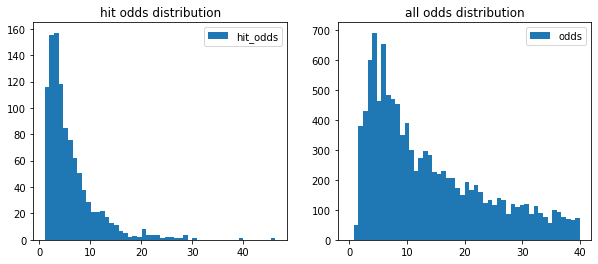

In [13]:
# accuracy of the first horse
i = 0
correct_first = 0
all_f = 0
increase = 0
X_test_inv = standard_scale.inverse_transform(X_test)
X_test_inv_df = pd.DataFrame(X_test_inv)
odds = X_test_inv_df[4].values
hit_odds = []
select = []

for i in range(len(Y_ans)):
    if (pred_order[i] == 1):  # いちい予想した総数  & (pred[i][1]*odds[i] > 1.0)) | (pred[i][1]> 0.25)
        all_f = all_f + 1
        if (Y_ans[i] == 1):
            correct_first = correct_first + 1   #　一致した総数
            increase += odds[i]
            hit_odds.append(odds[i])
            
            
            
print("all_f: ", all_f)
print("correct_first: ", correct_first)
print("hit odds average: ", np.array(hit_odds).mean())
print("spent money:", all_f * 100)
revenue = (increase - all_f) * 100
retrive = increase / all_f
 
print("retrive rate: ", retrive) 
print("revenue: ", revenue)
accurate_rate = correct_first / all_f
print("accuracy: ",accurate_rate)
#print("\n".join(map(str,hit_odds)))
print("min: ", min(hit_odds))
print("mid: ", np.median(np.array(hit_odds)))
print("max: ", max(hit_odds))

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.hist(hit_odds, bins = 50, label = "hit_odds")
axL.set_title('hit odds distribution')
axL.legend()
axR.hist(odds, bins = 50, label = "odds", range = (0,40))
axR.set_title('all odds distribution')
axR.legend()
fig.show()


accuracy:  0.19058823529411764
all_f_odds average:  11.4


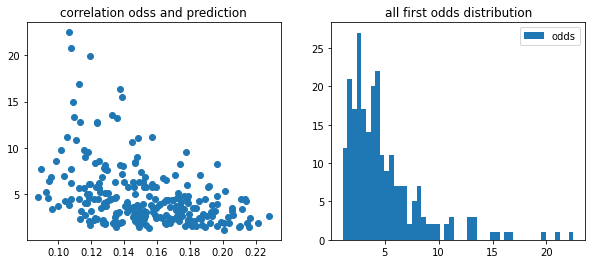

In [62]:
# 一位だった時一位予想していた確率
i = 0
correct_first = 0
all_f = 0
odds_f = []
p_rate_f = []

all_f_odds = []

for i in range(len(Y_ans)):
    if (Y_ans[i] == 1):  # 一位の総数
        all_f = all_f + 1
        all_f_odds.append(odds[i])
        if (pred_order[i] == 1):
            correct_first = correct_first + 1   #　一致した総数
            odds_f.append(odds[i])
            p_rate_f.append(pred[i][1])

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.scatter(p_rate_f, odds_f)  
axL.set_title('correlation odss and prediction')
#axL.xlabel('prediction rate first')
#axL.ylabel('odds')
axR.hist(odds_f, bins = 50, label = "odds")
axR.set_title('all first odds distribution')
axR.legend()

fig.show()
accurate_rate = correct_first / all_f
print("accuracy: ",accurate_rate)
print("all_f_odds average: ", np.array(all_f_odds).mean())



ensamble log

In [43]:
model1 = resnet.resrace(X_test.shape[1], 19)
model1.load_weights("model/win5_resrace_model_best1.h5")
pred1 = model1.predict(X_test)

In [44]:
model2 = resnet.resrace(X_test.shape[1], 19)
model2.load_weights("model/win5_resrace_model_best2.h5")
pred2 = model2.predict(X_test)

In [45]:
model3 = resnet.resrace(X_test.shape[1], 19)
model3.load_weights("model/win5_resrace_model_best3.h5")
pred3 = model3.predict(X_test)

In [46]:
model4 = resnet.resrace(X_test.shape[1], 19)
model4.load_weights("model/win5_resrace_model_best4.h5")
pred4 = model4.predict(X_test)

In [47]:
model5 = resnet.resrace(X_test.shape[1], 19)
model5.load_weights("model/win5_resrace_model_best5.h5")
pred5 = model5.predict(X_test)

In [48]:
model6 = resnet.resrace(X_test.shape[1], 19)
model6.load_weights("model/win5_resrace_model_best6.h5")
pred6 = model6.predict(X_test)

In [49]:
model7 = resnet.resrace(X_test.shape[1], 19)
model7.load_weights("model/win5_resrace_model_best7.h5")
pred7 = model7.predict(X_test)

In [50]:
model8 = resnet.resrace(X_test.shape[1], 19)
model8.load_weights("model/win5_resrace_model_best8.h5")
pred8 = model8.predict(X_test)

In [51]:
model9 = resnet.resrace(X_test.shape[1], 19)
model9.load_weights("model/win5_resrace_model_best9.h5")
pred9 = model9.predict(X_test)

In [52]:
model10 = resnet.resrace(X_test.shape[1], 19)
model10.load_weights("model/win5_resrace_model_best10.h5")
pred10 = model10.predict(X_test)

In [58]:
log_pred1 = np.log(pred1)
log_pred2 = np.log(pred2)
log_pred3 = np.log(pred3)
log_pred4 = np.log(pred4)
log_pred5 = np.log(pred5)
# log_pred6 = np.log(pred6)
# log_pred7 = np.log(pred7)
# log_pred8 = np.log(pred8)
# log_pred9 = np.log(pred9)
# log_pred10 = np.log(pred10)

sum_pred = log_pred1 + log_pred2 + log_pred3 + log_pred4 + log_pred5 #+ log_pred6 + log_pred7 + log_pred8 + log_pred9 + log_pred10
pred_order = np.argmax(sum_pred, axis = 1)

In [24]:
# print(sum_pred[:5])

[[ -92.500374   -20.10813    -17.505821   -16.513687   -14.976219
   -14.493359   -13.222591   -12.886332   -12.512679   -12.478747
   -11.932049   -12.158701   -12.034502   -12.656912   -14.057566
   -16.038065   -18.60048    -33.052044   -37.144245 ]
 [-148.93903    -16.659998   -13.859893   -13.222133   -11.323556
   -11.52779    -10.4130335  -10.327539   -10.932216   -11.930389
   -12.92849    -15.504711   -18.608528   -23.14984    -28.117496
   -32.706753   -37.238995   -61.38399    -67.225845 ]
 [-106.79495    -18.205135   -15.62729    -14.748198   -13.11282
   -12.945486   -11.783406   -11.413827   -11.453916   -11.632684
   -11.572009   -12.674328   -13.867571   -16.293985   -19.358545
   -22.550428   -26.093182   -42.98315    -47.908054 ]
 [-148.91325     -7.0621834   -7.6713886   -9.898946   -11.581405
   -13.209185   -14.140819   -15.5365305  -16.885832   -18.269995
   -20.148869   -22.154903   -24.924255   -27.35007    -29.743752
   -33.128033   -36.03937    -57.0517     -5

In [25]:
# print(pred_order[:5])

[10  7  7  1 10]
